# Import all needed Libraries/Module

In [90]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Read Data CSV

In [91]:
data = pd.read_csv('../Data/Dataset_Calorie.csv',index_col=0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0
...,...,...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002,9,26
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106,9,30
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725,9,31
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753,9,27


# Drop unused columns

In [92]:
data = data.drop(['Label', 'BMI_tags'], axis=1)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008
2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511
4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982
6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091
8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002
23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106
23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725
23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753


In [93]:
# gather information about data attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 1 to 23998
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10726 non-null  int64  
 1   weight(kg)                   10726 non-null  float64
 2   height(m)                    10726 non-null  float64
 3   gender                       10726 non-null  object 
 4   BMI                          10726 non-null  float64
 5   BMR                          10726 non-null  float64
 6   activity_level               10726 non-null  float64
 7   calories_to_maintain_weight  10726 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 754.2+ KB


In [94]:
data.isnull().sum()

age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
dtype: int64

In [95]:
data['weight(kg)'] = data['weight(kg)'].astype(int)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16,0.932025,F,18.531612,958.584,1.2,1150.3008
2,4,14,0.916687,F,17.397496,932.383,1.7,1585.0511
4,4,17,0.997288,F,17.997414,977.578,1.9,1857.3982
6,3,13,1.022786,F,12.936609,944.689,1.9,1794.9091
8,4,17,1.053977,M,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95,1.631113,F,35.874169,1510.154,1.3,1963.2002
23988,85,97,1.631409,F,36.812724,1473.418,1.7,2504.8106
23994,50,97,1.631864,F,36.711217,1635.925,1.7,2781.0725
23997,57,96,1.631290,F,36.386871,1593.981,1.3,2072.1753


In [96]:
# change gender data type from object to numeric
data['gender']=data['gender'].apply(lambda x: 1 if x=='F' else 0)
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
1,2,16,0.932025,1,18.531612,958.584,1.2,1150.3008
2,4,14,0.916687,1,17.397496,932.383,1.7,1585.0511
4,4,17,0.997288,1,17.997414,977.578,1.9,1857.3982
6,3,13,1.022786,1,12.936609,944.689,1.9,1794.9091
8,4,17,1.053977,0,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
23986,72,95,1.631113,1,35.874169,1510.154,1.3,1963.2002
23988,85,97,1.631409,1,36.812724,1473.418,1.7,2504.8106
23994,50,97,1.631864,1,36.711217,1635.925,1.7,2781.0725
23997,57,96,1.631290,1,36.386871,1593.981,1.3,2072.1753


In [97]:
# Find info about the value of each attribute
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,10726.0,26.778575,18.201675,2.000000,13.000000,23.000000,36.000000,90.000000
weight(kg),10726.0,61.137889,24.259708,12.000000,45.000000,61.000000,83.000000,98.000000
height(m),10726.0,1.540276,0.186042,0.856328,1.564845,1.631282,1.632234,1.633223
gender,10726.0,0.519485,0.499643,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,10726.0,24.788317,6.954637,10.342285,19.557137,23.056039,31.334294,37.142927
BMR,10726.0,1442.049923,250.686166,667.941000,1320.322500,1493.165000,1602.488000,1914.374000
activity_level,10726.0,1.487451,0.239625,1.200000,1.300000,1.500000,1.700000,1.900000
calories_to_maintain_weight,10726.0,2118.574075,388.425427,953.540900,1815.879700,2104.599800,2405.301750,2949.075500


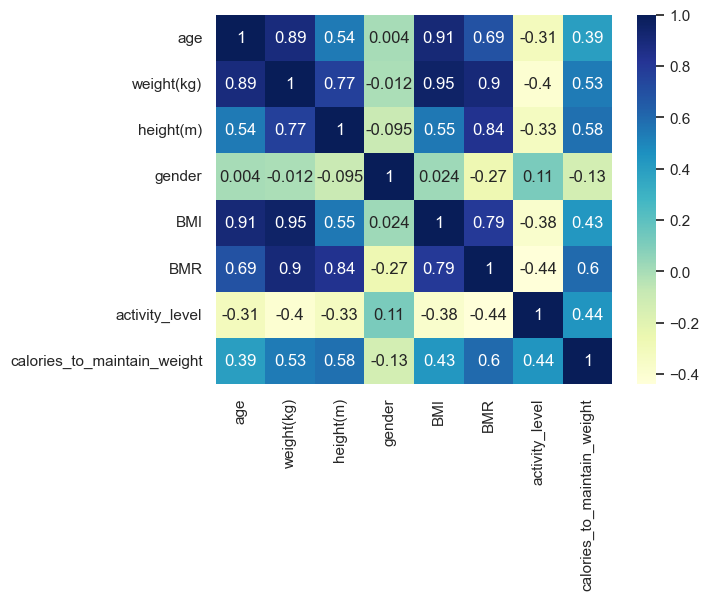

In [98]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
import matplotlib.pyplot as mp
# displaying heatmap
mp.show()

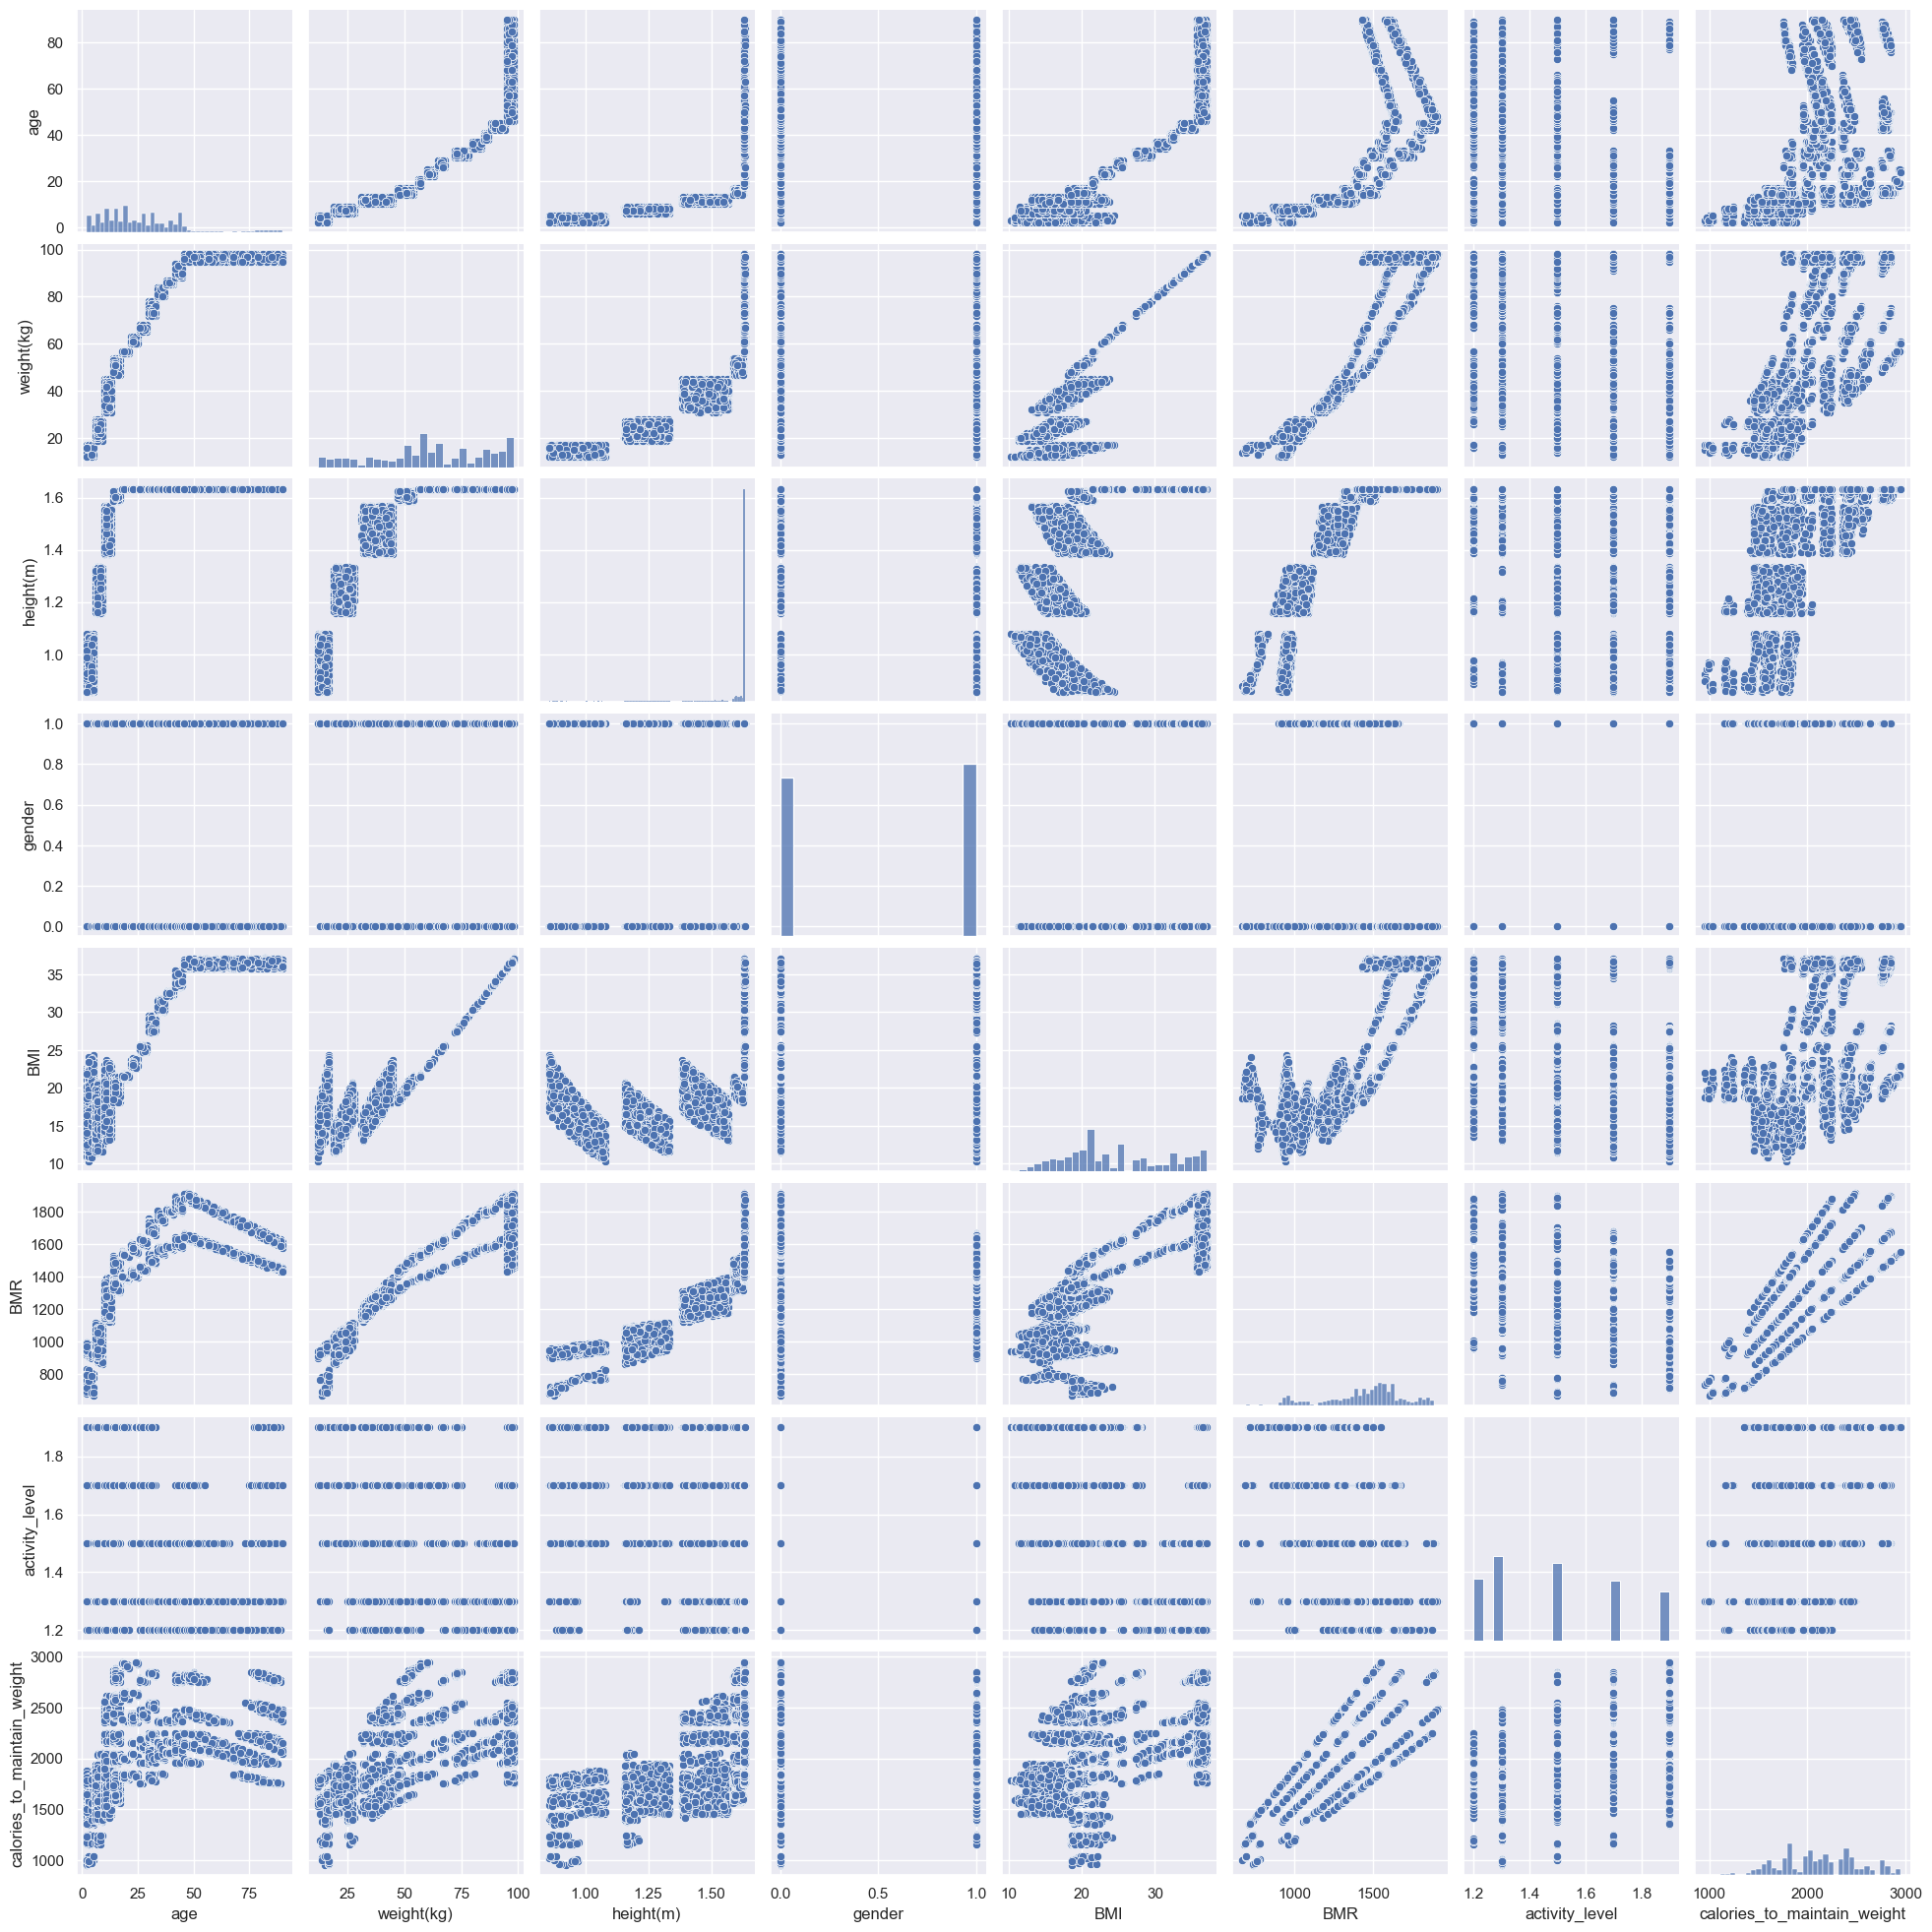

In [99]:
sns.set()
sns.pairplot(data)

In [100]:
# data.to_csv('../Data/drop_calorie.csv', index=False)

In [101]:
data['activity_level'].unique()

array([1.2, 1.7, 1.9, 1.3, 1.5])

In [102]:
temp=data[data['weight(kg)']==56]
temp=temp[temp['age']==20]
# temp=temp[temp['gender']==1]
temp

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
8000,20,56,1.633163,1,21.304188,1384.138,1.7,2353.0346
8033,20,56,1.632789,1,21.377908,1385.712,1.7,2355.7104
8035,20,56,1.632694,1,21.339756,1384.655,1.3,1800.0515
8049,20,56,1.632172,0,21.285599,1522.937,1.9,2893.5803
8060,20,56,1.632097,1,21.362765,1384.743,1.7,2354.0631
...,...,...,...,...,...,...,...,...
9939,20,56,1.633038,0,21.359529,1526.896,1.3,1984.9648
9949,20,56,1.631226,1,21.378886,1384.424,1.3,1799.7512
9950,20,56,1.631303,0,21.416283,1526.441,1.2,1831.7292
9970,20,56,1.632270,0,21.290123,1523.245,1.2,1827.8940


In [108]:
def calculateBMR(x):
    if x['gender']==1:
        return 665.1 + (9.563 * x['weight(kg)']) + (1.850 * x['height(m)']) - (4.676 * x['age'])
    else:
        return 66.47 + (13.75 * x['weight(kg)']) + (5.003 * x['height(m)']) - (6.755 * x['age'])

In [106]:
data['BMR_BARU']=data['BMR'].copy()
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMR_BARU
1,2,16,0.932025,1,18.531612,958.584,1.2,1150.3008,958.584
2,4,14,0.916687,1,17.397496,932.383,1.7,1585.0511,932.383
4,4,17,0.997288,1,17.997414,977.578,1.9,1857.3982,977.578
6,3,13,1.022786,1,12.936609,944.689,1.9,1794.9091,944.689
8,4,17,1.053977,0,15.338909,799.229,1.9,1518.5351,799.229
...,...,...,...,...,...,...,...,...,...
23986,72,95,1.631113,1,35.874169,1510.154,1.3,1963.2002,1510.154
23988,85,97,1.631409,1,36.812724,1473.418,1.7,2504.8106,1473.418
23994,50,97,1.631864,1,36.711217,1635.925,1.7,2781.0725,1635.925
23997,57,96,1.631290,1,36.386871,1593.981,1.3,2072.1753,1593.981


In [112]:
for index,row in data.iterrows():
    row['BMR_BARU'] ==calculateBMR(row)

In [110]:
data

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMR_BARU
1,2,16,0.932025,1,18.531612,958.584,1.2,1150.3008,958.584
2,4,14,0.916687,1,17.397496,932.383,1.7,1585.0511,932.383
4,4,17,0.997288,1,17.997414,977.578,1.9,1857.3982,977.578
6,3,13,1.022786,1,12.936609,944.689,1.9,1794.9091,944.689
8,4,17,1.053977,0,15.338909,799.229,1.9,1518.5351,799.229
...,...,...,...,...,...,...,...,...,...
23986,72,95,1.631113,1,35.874169,1510.154,1.3,1963.2002,1510.154
23988,85,97,1.631409,1,36.812724,1473.418,1.7,2504.8106,1473.418
23994,50,97,1.631864,1,36.711217,1635.925,1.7,2781.0725,1635.925
23997,57,96,1.631290,1,36.386871,1593.981,1.3,2072.1753,1593.981
